# ReLU

In [1]:
import numpy as np

# showing imported graphics
from IPython.display import display, Image

# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys # system library
sys.path.append('./lib_nn') # my path (linux, Mac OS)

from neural import * # import my library packages

Invoking __init__.py for neural


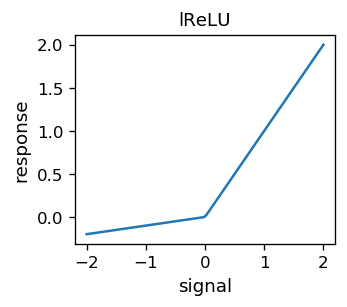

In [2]:
draw.plot(func.lrelu,title='lReLU');

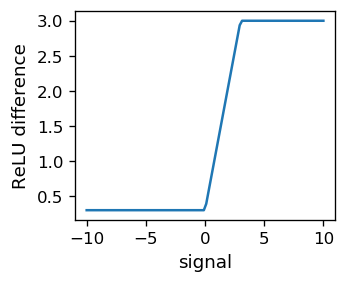

In [3]:
plt.figure(figsize=(2.8,2.3),dpi=120)

s = np.linspace(-10, 10, 100)

fs = [func.lrelu(z)-func.lrelu(z-3) for z in s]
plt.plot(s, fs)

plt.xlabel('signal',fontsize=11)
plt.ylabel('ReLU difference',fontsize=11);

In [4]:
def cir():
    x1=np.random.random() # coordinate 1
    x2=np.random.random() # coordinate 2
    if((x1-0.5)**2+(x2-0.5)**2 < 0.4*0.4): # inside the circle of radius 0.4
                                            # centered at (0.5,0.5)
        return np.array([x1,x2,1])
    else:                                              # outside
        return np.array([x1,x2,0])


In [5]:
sample_c=np.array([cir() for _ in range(1000)]) # sample
features_c=np.delete(sample_c,2,1)
labels_c=np.delete(np.delete(sample_c,0,1),0,1)

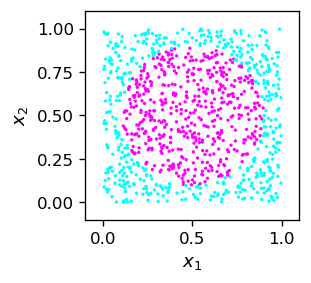

In [6]:
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(sample_c[:,0],sample_c[:,1],c=sample_c[:,2],
            s=1,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11);

We take the following architecture and initial parameters:

In [7]:
arch_c=[2,20,1]                   # architecture
weights=func.set_ran_w(arch_c,3)  # scaled random initial weights
eps=.01                           # initial learning speed 

In [8]:
for k in range(300):    # rounds
    eps=.9999*eps       # decrease learning speed
#    if k%100==99: print(k+1,' ',end='')             # print progress        
    for p in range(len(features_c)):                # loop over points
        func.back_prop_o(features_c,labels_c,p,arch_c,weights,eps,
            f=func.lrelu,df=func.dlrelu,fo=func.sig,dfo=func.dsig) # backprop

In [9]:
for k in range(700):    # rounds
    eps=.9999*eps       # decrease learning speed
#    if k%100==99: print(k+1,' ',end='')             # print progress        
    for p in range(len(features_c)):                # loop over points
        func.back_prop_o(features_c,labels_c,p,arch_c,weights,eps,
            f=func.relu,df=func.drelu,fo=func.sig,dfo=func.dsig) # backprop

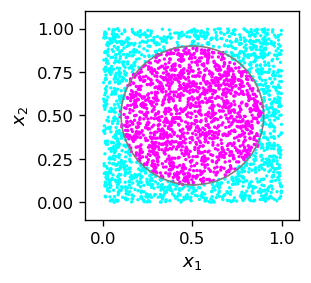

In [11]:
test=[] 

for k in range(3000):
    po=[np.random.random(),np.random.random()] 
    xt=func.feed_forward_o(arch_c,weights,po,ff=func.relu,ffo=func.sig)   
    test.append([po[0],po[1],np.round(xt[len(arch_c)-1][0],0)])

tt=np.array(test)

fig=plt.figure(figsize=(2.3,2.3),dpi=120)

# drawing the circle
ax=fig.add_subplot(1,1,1)
circ=plt.Circle((0.5,0.5), radius=.4, color='gray', fill=False)
ax.add_patch(circ)

plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=1,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11);

The trained network looks like this: 

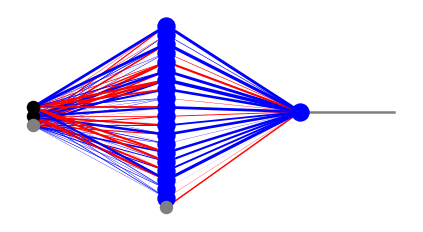

In [12]:
fnet=draw.plot_net_w(arch_c,weights,.3);